#  Data Preparation: Microsoft Movie Studios Viability Analysis                                      
***
- Name: Tenicka Norwood
- Program: Data Science Flex 
- Scheduled Project Review time: 10/26/2022 
- Instructor name: Joe Comeaux
- Blog post Url: 

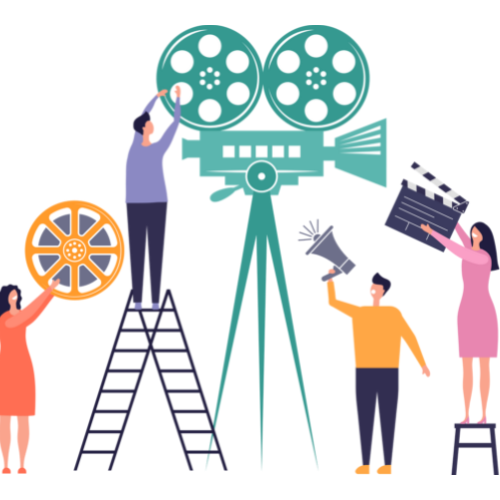
Photo by: Crownlab on [Canva](http://www.canva.com)

# Problem Statement 
***

Microsoft executives are in search of actionable insights to ensure successful movies are produced as they launch a new movie studio. 

As a new recruit for the newly formed performance business analysis team at Microsoft, I have been tasked with crafting a plan to make the company's decision to diversify their holdings to include creating original video content at their new movie studio that is both well supported with data and profitable.  The guiding question that I have been tasked to answer through data analysis is: Which types of films historically are the most successful at the box office? 

How do we prevent headlines like:

> ‘Fantastic Beasts’ turns ‘The Secrets of Dumbledore’ into too much of a snore - Review by Brian Lowry, CNN April 15, 2022

From negatively impacting our bottom line? 

With this in mind, I am working on the following questions:

* When is the best time of year to release a movie?
* Which director/actor combinations lead to the most profitable movies?
* Which genres of movies make the most profit at the box office?

# Method 
***
This project will explore data related to current trends in the movie industry. This exploration will include:
* Imporingt Relevant libraries
    - Access code from different modules
* Preparing Data
    - Access databases and dataframes useful to this project
    - Investigate data shape and datatype information
    - Drop null values
    - Reduce complexity (ex. join dataframes where necessary, remove or replace missing values, address duplicates data)
* Addressing Question 1 through Exploratory Data Analysis (EDA) 
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* Addression Question 2 through EDA
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* Addressing Question 3 through EDA
    - Build or extract features from cleaned data
    - Make visualizations
    - Analyze correlations
    - Summarize findings
* Discussion & Recommendations
    - Discuss findings
    - Identify next steps based on findings

# Data 
***

The datasets used in this project are from the following sources:
* [IMDB](https://www.imdb.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

There is a variety of information available on the web that can help as I try to identify the tools Microsoft will need to leverage to be a viable contender in the original video content space and compete as a new Movie studio within their brand. This data includes information on movie genres, titles, runtimes, production costs, gross box office revenue both foreign and domestic and release dates. With this data I will drill down for insights related to the impact that time of year, performer and genres have on success of movies at the box office.

# Import Relevant libraries
***

Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement.  The main libraries that will be used within this project include:
- sqlite3: a library that provides a SQL interface that allows accessing and manipulating SQL database
- pandas: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
- numpy: a key library that brings the computationaly power of languages like C to Python
- matplotlib: a comprehensive visualization library
- seaborn: a data visualization library based on matplotlib 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
# Create a connection to the imdb database
conn = sqlite3.connect('zippedData/im.db/im.db')

# Preparing the Data
***

First, I will review the IMDB data which is in a database that has multiple tables which have a column called movie_id that allows them to be combined. These tables include genres, primary titles, and runtimes, but do not have financial information in them so I will combine them with information from eithe The Numbers or Box Office Mojo. 


In [41]:
# Read in the data
# Select All from Movie Basics
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)

# Remove Future Projects
movie_basics = movie_basics[movie_basics['start_year'] < 2022]

#Explore data from Movie Ratings Table by Selecting all fields
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
#movie_ratings.head()

# Read Data from Box office Mojo
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Read Data from The Movie Databases
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
# Preview The Movie Database Movies Dataframe

In [39]:
# Display First Five Rows of the movie_basics table for Movies with Release dates prior to this year
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [4]:
# Information about the shape, datatypes and size of dataframe 
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146101 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146101 non-null  object 
 1   primary_title    146101 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146101 non-null  int64  
 4   runtime_minutes  114402 non-null  float64
 5   genres           140705 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [42]:
# Preview Box Office Mojo Dataframe
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [43]:
# Preview The Movie Database Movies Dataframe
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


While there are 146101 rows and 6 columns in the movie basics data. I notice that __three of those rows have missing values__:

- genres
- runtime_minutes
- original_title 

In [5]:
# Print the number of missing values for each column
print("The number of missing rows in the genres column is", len(movie_basics[movie_basics["genres"].isna()]),'.')
print("The number of missing rows in the runtime_minutes column is", len(movie_basics[movie_basics["runtime_minutes"].isna()]),'.')
print("The number of missing rows in the original_title colum is", len(movie_basics[movie_basics["original_title"].isna()]),'.')

The number of missing rows in the genres column is 5396 .
The number of missing rows in the runtime_minutes column is 31699 .
The number of missing rows in the original_title colum is 21 .


Since **there are only 21 __(~ 0.01 % of column data)__ rows of missing data** in the original_title column, we can delete these rows without skewing our results. 

In [6]:
# Address Missing Row values in movie_basics original_title column
movie_basics.dropna(subset =["original_title"], inplace = True)

In [7]:
# Check the shape of the data
movie_basics.shape

(146080, 6)

Now that I deleted the rows that were missing original_title data, I will check to see if the features have changed by using 
__.info()__.

In [8]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  114398 non-null  float64
 5   genres           140703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


There are 31699 rows of missing data in the runtime_minutes column which means that __only ~78% of movies have a known run time in minutes__ so I will replace the null values with the median value of the runtime_minutes column the dataframe. 

In [9]:
# Address Missing Row values in runtime_minutes column
movie_basics["runtime_minutes"].fillna(movie_basics["runtime_minutes"].median(), inplace = True)

In [10]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  146080 non-null  float64
 5   genres           140703 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


Now the movie_basics dataframe has *5 out of 6 columns* without any missing values. This leaves the genres column which has 5408 missing rows of data. While this represents ~3.7% of the data in the column, we do not want to drop this data since it may have an affect on our results.

In [11]:
movie_basics["genres"].value_counts()
movie_basics["genres"].value_counts().head(20)

Documentary                      32184
Drama                            21484
Comedy                            9177
Horror                            4371
Comedy,Drama                      3519
Thriller                          3046
Action                            2213
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1453
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

In [12]:
# Address missing genres values with placeholder called Missing.
movie_basics["genres"].fillna("Missing", inplace = True)

In [13]:
# Review movie _basics info to see if overall columns have changed
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146080 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146080 non-null  object 
 1   primary_title    146080 non-null  object 
 2   original_title   146080 non-null  object 
 3   start_year       146080 non-null  int64  
 4   runtime_minutes  146080 non-null  float64
 5   genres           146080 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


Now the movie_basics dataframe has __6 columns of data__ each with 146123 entries and __no missing data.__

There are several movies listed under two or more genres. For example there 3519 movies that are listed under both Comedy and Drama and 1028 movies listed under three genres (Biography, Documentary and Drama) for the same movie. 

In [14]:
# Address movies listed under multiple genres
movie_basics["multi_genre"] = movie_basics["genres"].str.split(",")
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [15]:
exploded_movie_basics = movie_basics.explode("multi_genre")
exploded_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",Drama


In [17]:
# Get the descriptive statistics for averagerating
movie_ratings["averagerating"].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

In [18]:
# Information about the shape, datatypes and size of dataframe 
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
movie_ratings["averagerating"].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

Now I will remove movie ratings that are rated 6 or lower, since the mean and median values are **6.33** and **6.50** respectively.

In [20]:
filtered_movie_ratings = movie_ratings[movie_ratings["averagerating"] <= 6]
filtered_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27968 entries, 3 to 73853
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       27968 non-null  object 
 1   averagerating  27968 non-null  float64
 2   numvotes       27968 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 874.0+ KB


In [21]:
# Read in movie budget data from The Numbers 
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
# Preview The Numbers movie_budgets Dataframe
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df["release_year"] = movie_budgets_df['release_date'].dt.year
movie_budgets_df["release_month"] = movie_budgets_df['release_date'].dt.month
movie_budgets_df.drop("release_date", axis = 1, inplace = True)

In [23]:
# Review the shape and datatype information of The numbers movie_budgets dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
 5   release_year       5782 non-null   int64 
 6   release_month      5782 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 316.3+ KB


In [25]:
# Remove $ and , from Entire Dataframe
movie_budgets_df = movie_budgets_df.replace({"\$":""}, regex = True)
movie_budgets_df = movie_budgets_df.replace({"\,":""}, regex = True)

In [26]:
# Inspect first five rows of movie_budgets dataframe
movie_budgets_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,Avatar,425000000,760507625,2776345279,2009,12
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [27]:
# Replace production_budget, domestic_gross and worldwide_gross with float values in Millions of $
movie_budgets_df["production_budget"] = pd.to_numeric(movie_budgets_df["production_budget"])
movie_budgets_df["domestic_gross"] = pd.to_numeric(movie_budgets_df["domestic_gross"])
movie_budgets_df["worldwide_gross"] = pd.to_numeric(movie_budgets_df["worldwide_gross"])
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
 5   release_year       5782 non-null   int64 
 6   release_month      5782 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 316.3+ KB


In [29]:
# Create a new column called worldwide_profit
movie_budgets_df["worldwide_profit"] = (movie_budgets_df["worldwide_gross"]-movie_budgets_df["production_budget"])

# Create a new column called ROI
movie_budgets_df["ROI"] = movie_budgets_df["worldwide_profit"]/movie_budgets_df["production_budget"] *100
movie_budgets_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI
0,1,Avatar,425000000,760507625,2776345279,2009,12,2351345279,553.26
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,635063875,154.67
2,3,Dark Phoenix,350000000,42762350,149762350,2019,6,-200237650,-57.21
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1072413963,324.38
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,999721747,315.37


In [38]:
# Create a new dataframe 
budgets_by_month_df = movie_budgets_df.groupby("release_month").median()

budgets_by_month_df = budgets_by_month_df.sort_values("release_month")

month_dict = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
budgets_by_month_df["month_name"] = month_dict.values()
budgets_by_month_df.head()

,id,production_budget,domestic_gross,worldwide_gross,release_year,worldwide_profit,ROI,month_name
release_month,,,,,,,,
1,48.00,14000000.00,14218868.00,20169934.00,2008.00,5322212.00,51.21,Jan
2,48.50,17250000.00,19096003.00,33097834.50,2008.00,10443556.00,74.03,Feb
3,51.00,15000000.00,15303247.50,25599836.00,2007.00,7811580.50,53.13,Mar
4,52.00,15000000.00,12222522.50,20068010.00,2007.00,4639885.00,39.99,Apr
5,51.00,16000000.00,19894664.00,29934477.00,2006.00,13609577.00,107.57,May


In [47]:
## Merge the imdb movie_basics and movie_ratings dataframes
#imdb_df = pd.merge(left = movie_basics, right = filtered_movie_ratings, how = 'left', left_on = "movie_id", right_on = "movie_id")
#imdb_df.head()
tn_and_imdb = pd.merge(left = movie_budgets_df, right = movie_basics, left_on = ["movie", "release_year"], right_on = ["primary_title", "start_year"], how = "inner")
tn_and_imdb.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,worldwide_profit,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,635063875,154.67,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy"
1,3,Dark Phoenix,350000000,42762350,149762350,2019,6,-200237650,-57.21,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi"
2,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1072413963,324.38,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi"
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,1748134200,582.71,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi"
4,9,Justice League,300000000,229024295,655945209,2017,11,355945209,118.65,tt0974015,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy"


In [51]:
# Merge the bom and tn data into single dataframe
bom_and_tn = pd.merge(left = bom_df, right = movie_budgets_df, left_on = ["title", "year"], 
                        right_on = ["movie", "release_year"])

bom_and_tn.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,movie,production_budget,domestic_gross_y,worldwide_gross,release_year,release_month,worldwide_profit,ROI
0,Toy Story 3,BV,415000000.00,652000000,2010,47,Toy Story 3,200000000,415004880,1068879522,2010,6,868879522,434.44
1,Inception,WB,292600000.00,535700000,2010,38,Inception,160000000,292576195,835524642,2010,7,675524642,422.20
2,Shrek Forever After,P/DW,238700000.00,513900000,2010,27,Shrek Forever After,165000000,238736787,756244673,2010,5,591244673,358.33
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000,2010,53,The Twilight Saga: Eclipse,68000000,300531751,706102828,2010,6,638102828,938.39
4,Iron Man 2,Par.,312400000.00,311500000,2010,15,Iron Man 2,170000000,312433331,621156389,2010,5,451156389,265.39


In [25]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146122
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  146123 non-null  float64
 5   genres           146123 non-null  object 
 6   multi_genre      146123 non-null  object 
 7   averagerating    73856 non-null   float64
 8   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 11.1+ MB


In [29]:
# Sort the dataframe with the worldwide_profit column as a reference using sort_values function
tn_movie_budgets_df.sort_values("worldwide_profit", ascending = False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,worldwide_profit
0,1,Dec 18 2009,Avatar,425.00,760.51,2776.35,2009,2351.35
42,43,Dec 19 1997,Titanic,200.00,659.36,2208.21,1997,2008.21
6,7,Apr 27 2018,Avengers: Infinity War,300.00,678.82,2048.13,2018,1748.13
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306.00,936.66,2053.31,2015,1747.31
33,34,Jun 12 2015,Jurassic World,215.00,652.27,1648.85,2015,1433.85
66,67,Apr 3 2015,Furious 7,190.00,353.01,1518.72,2015,1328.72
26,27,May 4 2012,The Avengers,225.00,623.28,1517.94,2012,1292.94
260,61,Jul 15 2011,Harry Potter and the Deathly Hallows: Part II,125.00,381.19,1341.69,2011,1216.69
41,42,Feb 16 2018,Black Panther,200.00,700.06,1348.26,2018,1148.26
112,13,Jun 22 2018,Jurassic World: Fallen Kingdom,170.00,417.72,1305.77,2018,1135.77


In [30]:
tn_movie_budgets_df["primary_title"] = tn_movie_budgets_df["movie"]

In [31]:
#tn_movie_budgets_df["test"] = tn_movie_budgets_df["movie"].astype(str)+tn_movie_budgets_df["start_year"].astype(str)

In [32]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,worldwide_profit,primary_title
0,1,Dec 18 2009,Avatar,425.00,760.51,2776.35,2009,2351.35,Avatar
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410.60,241.06,1045.66,2011,635.06,Pirates of the Caribbean: On Stranger Tides
2,3,Jun 7 2019,Dark Phoenix,350.00,42.76,149.76,2019,-200.24,Dark Phoenix
3,4,May 1 2015,Avengers: Age of Ultron,330.60,459.01,1403.01,2015,1072.41,Avengers: Age of Ultron
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317.00,620.18,1316.72,2017,999.72,Star Wars Ep. VIII: The Last Jedi


In [33]:
#imdb_df["test"] = imdb_df["original_title"].astype(str)+imdb_df["start_year"].astype(str)

In [34]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,multi_genre,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama","[Action, Crime, Drama]",nan,nan
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama","[Biography, Drama]",nan,nan
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,[Drama],nan,nan
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.00,"Comedy,Drama","[Comedy, Drama]",nan,nan
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",nan,nan


In [36]:
movie_data_df = pd.merge(left = tn_movie_budgets_df, right = imdb_df, how = 'inner', left_on = "primary_title", right_on = "primary_title")

In [52]:
movie_data_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year_x,worldwide_profit,test,movie_id,primary_title,original_title,start_year_y,runtime_minutes,genres,multi_genre,averagerating,numvotes
0,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410.60,241.06,1045.66,2011,635.06,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",6.60,447624.00
1,3,Jun 7 2019,Dark Phoenix,350.00,42.76,149.76,2019,-200.24,Dark Phoenix2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",6.00,24451.00
2,4,May 1 2015,Avengers: Age of Ultron,330.60,459.01,1403.01,2015,1072.41,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",7.30,665594.00
3,7,Apr 27 2018,Avengers: Infinity War,300.00,678.82,2048.13,2018,1748.13,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]",8.50,670926.00
4,9,Nov 17 2017,Justice League,300.00,229.02,655.95,2017,355.95,Justice League2017,tt0974015,Justice League,Justice League,2017,120.00,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]",6.50,329135.00


In [37]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3794
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3795 non-null   int64  
 1   release_date       3795 non-null   object 
 2   movie              3795 non-null   object 
 3   production_budget  3795 non-null   float64
 4   domestic_gross     3795 non-null   float64
 5   worldwide_gross    3795 non-null   float64
 6   start_year_x       3795 non-null   int64  
 7   worldwide_profit   3795 non-null   float64
 8   primary_title      3795 non-null   object 
 9   movie_id           3795 non-null   object 
 10  original_title     3795 non-null   object 
 11  start_year_y       3795 non-null   int64  
 12  runtime_minutes    3795 non-null   float64
 13  genres             3795 non-null   object 
 14  multi_genre        3795 non-null   object 
 15  averagerating      1075 non-null   float64
 16  numvotes           1075 

In [55]:
movie_data_df["ROI"] = (movie_data_df["worldwide_profit"]/movie_data_df["production_budget"])*100
movie_data_df.head()

,production_budget,domestic_gross,worldwide_gross,start_year_x,worldwide_profit,movie_id,runtime_minutes,multi_genre,primary_title,ROI
0,425.00,760.51,2776.35,2009,2351.35,tt1775309,93.00,[Horror],Avatar,553.26
1,410.60,241.06,1045.66,2011,635.06,tt1298650,136.00,"[Action, Adventure, Fantasy]",Pirates of the Caribbean: On Stranger Tides,154.67
2,350.00,42.76,149.76,2019,-200.24,tt6565702,113.00,"[Action, Adventure, Sci-Fi]",Dark Phoenix,-57.21
3,330.60,459.01,1403.01,2015,1072.41,tt2395427,141.00,"[Action, Adventure, Sci-Fi]",Avengers: Age of Ultron,324.38
4,300.00,678.82,2048.13,2018,1748.13,tt4154756,149.00,"[Action, Adventure, Sci-Fi]",Avengers: Infinity War,582.71


Next I deleted columns that I am not using in my analysis.

In [38]:
movie_data_df.drop("numvotes", axis = 1, inplace = True)
movie_data_df.drop("id",axis = 1, inplace = True)
movie_data_df.drop("release_date", axis = 1, inplace = True)
movie_data_df.drop("original_title", axis = 1, inplace = True)
movie_data_df.drop("primary_title", axis = 1, inplace = True)
movie_data_df.drop("averagerating", axis = 1, inplace = True)
movie_data_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,start_year_x,worldwide_profit,movie_id,start_year_y,runtime_minutes,genres,multi_genre
0,Avatar,425.00,760.51,2776.35,2009,2351.35,tt1775309,2011,93.00,Horror,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,410.60,241.06,1045.66,2011,635.06,tt1298650,2011,136.00,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"
2,Dark Phoenix,350.00,42.76,149.76,2019,-200.24,tt6565702,2019,113.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,330.60,459.01,1403.01,2015,1072.41,tt2395427,2015,141.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,300.00,678.82,2048.13,2018,1748.13,tt4154756,2018,149.00,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"


In [39]:
movie_data_df.drop("genres", axis = 1, inplace = True)
movie_data_df.drop("start_year_y", axis = 1, inplace = True)

In [49]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3794
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3795 non-null   object 
 1   production_budget  3795 non-null   float64
 2   domestic_gross     3795 non-null   float64
 3   worldwide_gross    3795 non-null   float64
 4   start_year_x       3795 non-null   int64  
 5   worldwide_profit   3795 non-null   float64
 6   movie_id           3795 non-null   object 
 7   runtime_minutes    3795 non-null   float64
 8   multi_genre        3795 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.5+ KB


In [53]:
movie_data_df['primary_title'] = movie_data_df["movie"]
movie_data_df.drop("movie", axis = 1, inplace = True)
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3794
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  3795 non-null   float64
 1   domestic_gross     3795 non-null   float64
 2   worldwide_gross    3795 non-null   float64
 3   start_year_x       3795 non-null   int64  
 4   worldwide_profit   3795 non-null   float64
 5   movie_id           3795 non-null   object 
 6   runtime_minutes    3795 non-null   float64
 7   multi_genre        3795 non-null   object 
 8   primary_title      3795 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 296.5+ KB


Currently my dataset has 3795 non null values that I am using for my analysis across 9 columns.

# Analyze Data for Business Insights

In [57]:
# Create a subset of data to investigate the correlation between production budget and success at the worldwide box office 
movie_ROI_df = movie_data_df.loc[:, ["primary_title", "production_budget","worldwide_profit", "worldwide_gross", "ROI"]]
movie_ROI_df.head()

,primary_title,production_budget,worldwide_profit,worldwide_gross,ROI
0,Avatar,425.00,2351.35,2776.35,553.26
1,Pirates of the Caribbean: On Stranger Tides,410.60,635.06,1045.66,154.67
2,Dark Phoenix,350.00,-200.24,149.76,-57.21
3,Avengers: Age of Ultron,330.60,1072.41,1403.01,324.38
4,Avengers: Infinity War,300.00,1748.13,2048.13,582.71


In [58]:
# Investigate Statistics from movie_ROI dataframe
movie_ROI_df.describe()

,production_budget,worldwide_profit,worldwide_gross,ROI
count,3795.00,3795.00,3795.00,3795.00
mean,32.71,61.68,94.39,331.65
std,45.04,160.66,192.47,1525.29
min,0.00,-200.24,0.00,-100.00
25%,4.50,-3.00,2.05,-70.71
50%,16.00,5.90,25.11,46.31
75%,40.00,55.77,94.14,249.47
max,425.00,2351.35,2776.35,41556.47


In [59]:
# Review overall information about movie_ROI_df
movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3794
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      3795 non-null   object 
 1   production_budget  3795 non-null   float64
 2   worldwide_profit   3795 non-null   float64
 3   worldwide_gross    3795 non-null   float64
 4   ROI                3795 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.9+ KB


In [61]:
# Sorting by worldwide gross
movie_ROI_df.sort_values("worldwide_gross", ascending = False)
movie_ROI_df.head()

,primary_title,production_budget,worldwide_profit,worldwide_gross,ROI
0,Avatar,425.00,2351.35,2776.35,553.26
1,Pirates of the Caribbean: On Stranger Tides,410.60,635.06,1045.66,154.67
2,Dark Phoenix,350.00,-200.24,149.76,-57.21
3,Avengers: Age of Ultron,330.60,1072.41,1403.01,324.38
4,Avengers: Infinity War,300.00,1748.13,2048.13,582.71


In [62]:
movie_ROI_df["production_budget"].describe()

count   3795.00
mean      32.71
std       45.04
min        0.00
25%        4.50
50%       16.00
75%       40.00
max      425.00
Name: production_budget, dtype: float64

In [65]:
filtered_movie_ROI_df = movie_ROI_df[movie_ROI_df["production_budget"] >= 2]
filtered_movie_ROI_df.head()

,primary_title,production_budget,worldwide_profit,worldwide_gross,ROI
0,Avatar,425.00,2351.35,2776.35,553.26
1,Pirates of the Caribbean: On Stranger Tides,410.60,635.06,1045.66,154.67
2,Dark Phoenix,350.00,-200.24,149.76,-57.21
3,Avengers: Age of Ultron,330.60,1072.41,1403.01,324.38
4,Avengers: Infinity War,300.00,1748.13,2048.13,582.71


Since our company wants to compete against the top movie studios, I used a minimum production budget of 2 million dollars which 
is the top of the small budget movie range. This takes our dataset to 3255 movies to analyze.

In [66]:
filtered_movie_ROI_df["production_budget"].describe()

count   3255.00
mean      38.01
std       46.56
min        2.00
25%        9.00
50%       20.00
75%       47.00
max      425.00
Name: production_budget, dtype: float64

## Investigate the relationship between production budget and worlwide gross revenue for the top 100 grossing films.

In Figure 2.1 I looked at the relationship between production budget and worlwide gross for the top 100 grossing films in my dataset.
As a business, we want to get the largest revenue while minimizing production costs. From figure 2.1 I noticed that while the median
production cost is around 20 million dollars, __production costs of around 200 million dollars have the most consistent worldwide gross revenue__.
In fact more films that had production budgets of over 100 million but less than 250 million dollars saw worldwide gross revenue of 500 
million dollars or more than any other movies in the top 100 highest grossing movies in my dataset. While movies over 400 million dollars seem to generate at least the same amount of worldwide revenue as the production costs, the number of movies in this category seem to be outliers.  

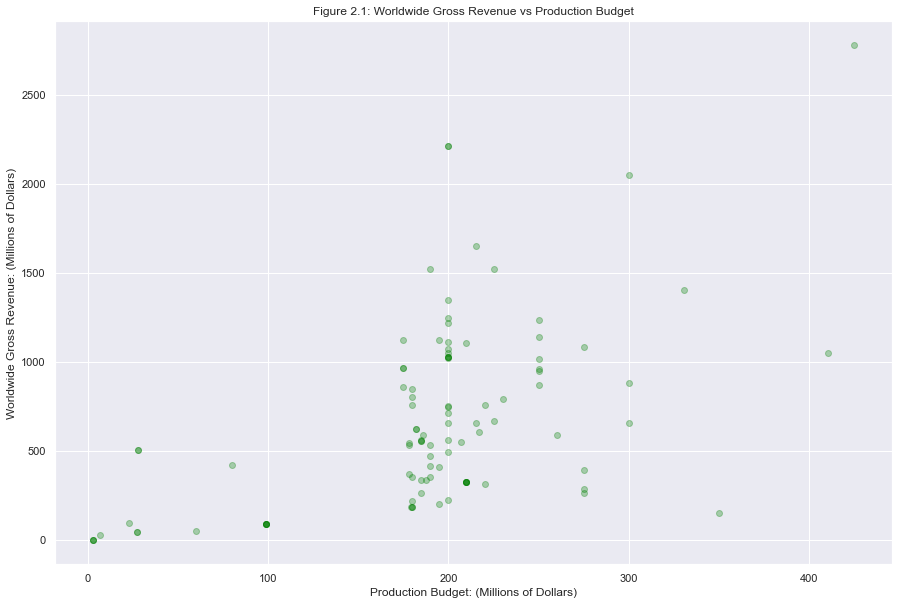

In [124]:
# Set up theme
sns.set_theme(style="darkgrid", palette="Set2")
# Set up plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(x = "production_budget", y = "worldwide_gross", data = filtered_movie_ROI_df.head(100), alpha=0.3, color="green")
ax.set_title("Figure 2.1: Worldwide Gross Revenue vs Production Budget")
ax.set_xlabel("Production Budget: (Millions of Dollars)")
ax.set_ylabel("Worldwide Gross Revenue: (Millions of Dollars)");

In [88]:
# Print out the name of the column and the Pearson correlation of 
# the column most positively correlated with ROI (not including ROI)
correlation_values = filtered_movie_ROI_df.corr()["ROI"].sort_values() # Since this is sorted the final value is SalePrice correlated to itself

max_correlation_value = correlation_values.iloc[-2]
max_correlation_column = correlation_values.index[-2]

print("The column that is most positively correlated with ROI:", max_correlation_column)
print("The maximum correlation value is:", max_correlation_value)

The column that is most positively correlated with ROI: worldwide_profit
The maximum correlation value is: 0.3137947010104815


In [125]:
new_filtered_movie_ROI_df = filtered_movie_ROI_df[filtered_movie_ROI_df["production_budget"] >= 175]
new_filtered_movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 115
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      99 non-null     object 
 1   production_budget  99 non-null     float64
 2   worldwide_profit   99 non-null     float64
 3   worldwide_gross    99 non-null     float64
 4   ROI                99 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [133]:
new_filtered_movie_ROI_df = new_filtered_movie_ROI_df[new_filtered_movie_ROI_df["production_budget"] <= 250]
new_filtered_movie_ROI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 115
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      87 non-null     object 
 1   production_budget  87 non-null     float64
 2   worldwide_profit   87 non-null     float64
 3   worldwide_gross    87 non-null     float64
 4   ROI                87 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.1+ KB


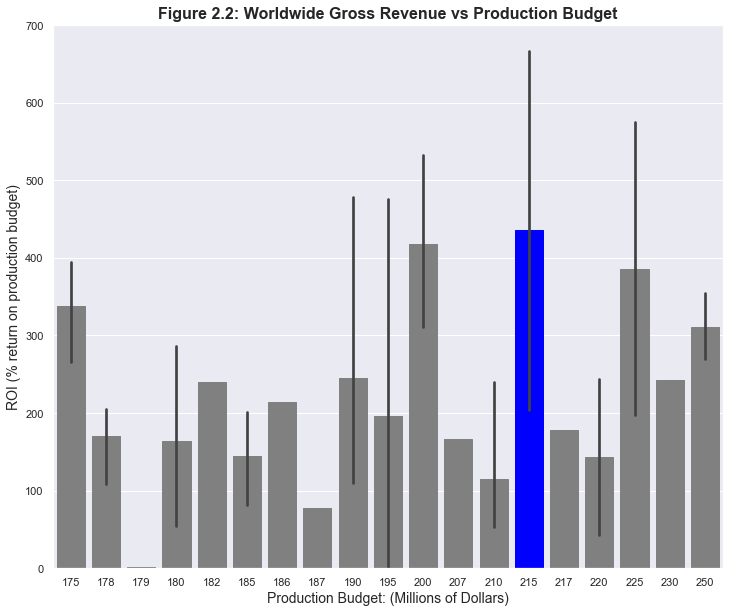

In [289]:
# Set up theme
#sns.set_theme(style="darkgrid", palette="Set2")

# Create plot variables
values = np.array(new_filtered_movie_ROI_df.ROI)
labels = np.array(new_filtered_movie_ROI_df.production_budget.astype(int))
clrs = ['grey' if (x != max(values)) else 'blue' for x in values]

# Set up plot figure size
plt.figure(figsize =(12,10))
ax = sns.barplot(x = labels, y = values, palette = clrs)
ax.set_title("Figure 2.2: Worldwide Gross Revenue vs Production Budget", weight = 'bold').set_fontsize('16')
ax.set_xlabel("Production Budget: (Millions of Dollars)", fontsize = '14')
ax.set_ylabel("ROI (% return on production budget)", fontsize = '14');
for bar in ax.patches:
    if bar.get_height() < 430:
        bar.set_color('grey')
    else:
        bar.set_color('blue')

From Figure 2.2 the most ideal production cost is **215 million dollars**. In this figure ROI is calculated by dividing worlwide profit by the production cost and multiplying by 100.
\begin{equation*}
ROI  =\frac{\text{worldwide profit}}{\text{production budget}} * 100
\end{equation*}

## Investigating the relationship between Genre and Production Budget

In [200]:
# Create a smaller dataframe to investigate production cost by genre
genre_budget_df = movie_data_df.loc[:, ["multi_genre","primary_title", "production_budget",  "worldwide_gross","ROI"]]
genre_budget_df.head()


,multi_genre,primary_title,production_budget,worldwide_gross,ROI
0,[Horror],Avatar,425.00,2776.35,553.26
1,"[Action, Adventure, Fantasy]",Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
2,"[Action, Adventure, Sci-Fi]",Dark Phoenix,350.00,149.76,-57.21
3,"[Action, Adventure, Sci-Fi]",Avengers: Age of Ultron,330.60,1403.01,324.38
4,"[Action, Adventure, Sci-Fi]",Avengers: Infinity War,300.00,2048.13,582.71


In [201]:
# Explode genres 
exploded_genre_budget_df = genre_budget_df.explode("multi_genre")
exploded_genre_budget_df.head()

,multi_genre,primary_title,production_budget,worldwide_gross,ROI
0,Horror,Avatar,425.00,2776.35,553.26
1,Action,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
1,Adventure,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
1,Fantasy,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
2,Action,Dark Phoenix,350.00,149.76,-57.21


In [202]:
# Group by multi_genre by production budget
grouped_genre_budget = exploded_genre_budget_df.groupby("multi_genre")["production_budget"].median()
grouped_genre_budget.head()

multi_genre
Action      38.00
Adventure   74.00
Animation   75.00
Biography   18.00
Comedy      20.00
Name: production_budget, dtype: float64

In [203]:
# Create a dataframe from the series
grouped_genre_budget_df = grouped_genre_budget.to_frame(name = "production_budget").reset_index()
grouped_genre_budget_df.head()

,multi_genre,production_budget
0,Action,38.00
1,Adventure,74.00
2,Animation,75.00
3,Biography,18.00
4,Comedy,20.00


In [204]:
# Sort by Production Budget 
grouped_genre_budget_df.sort_values("production_budget", ascending = False)

,multi_genre,production_budget
2,Animation,75.00
1,Adventure,74.00
9,Fantasy,40.00
0,Action,38.00
19,Sci-Fi,30.00
16,News,22.00
10,History,20.00
4,Comedy,20.00
5,Crime,20.00
8,Family,20.00


In [205]:
# Count unique elements in each column
exploded_genre_budget_df.nunique()

multi_genre            24
primary_title        2296
production_budget     341
worldwide_gross      2138
ROI                  2137
dtype: int64

In [222]:
exploded_genre_budget_df.sort_values("worldwide_gross", ascending = False)
exploded_genre_budget_df.head()

,multi_genre,primary_title,production_budget,worldwide_gross,ROI
0,Horror,Avatar,425.00,2776.35,553.26
1,Action,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
1,Adventure,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
1,Fantasy,Pirates of the Caribbean: On Stranger Tides,410.60,1045.66,154.67
2,Action,Dark Phoenix,350.00,149.76,-57.21


In [229]:
# Group by multi_genre by production budget
grouped_genre_wwgross = exploded_genre_budget_df.groupby("multi_genre")["worldwide_gross"].median()
grouped_genre_wwgross.head()

multi_genre
Action       73.11
Adventure   151.62
Animation   197.50
Biography    25.27
Comedy       38.16
Name: worldwide_gross, dtype: float64

In [231]:
# Sort by Worldwide gross

grouped_genre_wwgross.sort_values("worldwide_gross", ascending = False)
grouped_genre_wwgross

ValueError: No axis named worldwide_gross for object type Series

In [220]:
full_genre_gross_df = exploded_genre_budget_df.groupby('multi_genre')["worldwide_gross"].median()
full_genre_gross_df.describe()

count    24.00
mean     42.80
std      45.97
min       0.00
25%      18.00
50%      23.72
75%      48.53
max     197.50
Name: worldwide_gross, dtype: float64

In [225]:
exploded_genre_budget_df["multi_genre"].describe()

count      7822
unique       24
top       Drama
freq       1808
Name: multi_genre, dtype: object

In [210]:
# Create a dataframe from the series
final_genre_budget_df = full_genre_gross_df.to_frame(name = "worldwide_gross").reset_index()
final_genre_budget_df.head()

,multi_genre,worldwide_gross
0,Action,73.11
1,Adventure,151.62
2,Animation,197.50
3,Biography,25.27
4,Comedy,38.16


In [219]:
final_genre_budget_df.describe()

,worldwide_gross
count,24.00
mean,42.80
std,45.97
min,0.00
25%,18.00
50%,23.72
75%,48.53
max,197.50
